<a href="https://colab.research.google.com/github/mickeykubo/analytics_book/blob/master/sklearn2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python言語によるビジネスアナリティクス

## 実務家のための最適化，統計分析，機械学習（近代科学社）


## scikit-learn を用いた 機械学習の例題と練習問題 


## 教科書 付録 B参照

使用するパッケージをインストール

すでにインストールされている場合には，RUNTIMEのリスタートが必要

In [17]:
!pip install -U yellowbrick==1.0.1

     |████████████████████████████████| 389kB 2.8MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [2]:
import yellowbrick
yellowbrick.__version__

'1.0.1'



# B2  線形回帰

広告のデータ http://logopt.com/data/Advertising.csv を用いる．

テレビ(TV)，ラジオ(Radio)，新聞(Newspaper)への広告から売り上げ(Sales)を予測する．

In [0]:
import pandas as pd #まずはpandasモジュールを準備する．

In [5]:
#csvファイルからデータ読み込み
data = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col =0) #0行目をインデックスにする．
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


独立変数（特徴ベクトル）$X$ は TV, Ratio, Newspaperの列，従属変数 $y$ は Salesの列


In [6]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


## scikit-learnの基本手順

- 手順１：クラスをインポートして，インスタンスを生成する．

- 手順２：fitメソッドを用いて，データから訓練する．

- 手順３：predictメソッドを用いて予測を行う．


In [0]:
from sklearn.linear_model import LinearRegression #線形回帰クラス LinearRegression のインポート
reg = LinearRegression() # 線形回帰クラスのインスタンス reg 生成
reg.fit(X, y)           # fitによる訓練
yhat = reg.predict(X)   # predictによる予測

In [8]:
print("y-切片= ",reg.intercept_)
print("係数 = ",reg.coef_)

y-切片=  2.938889369459412
係数 =  [ 0.04576465  0.18853002 -0.00103749]


In [9]:
SSE = ((yhat-y)**2).sum()      # Sum of Square Error
SST = ((y.mean()-y)**2).sum()  # Total Sum of Square
print("R2 =", 1-SSE/SST)       # 決定係数 R^2

R2 = 0.8972106381789522


In [0]:
SSE = ((yhat-y)**2).sum()      # Sum of Square Error
#SST = ((y.mean()-y)**2).sum()  # Total Sum of Square
#print("R2 =", 1-SSE/SST)

In [11]:
print(reg.score(X,y)) #決定係数の別計算

0.8972106381789521


## 可視化（回帰）

### Yellowbrickパッケージを用いる．

https://www.scikit-yb.org/en/latest/index.html

### インストール
```
!pip install -U yellowbrick==1.0.1
```

### 可視化の基本手順

- 手順１：クラスをインポートして，可視化インスタンスを生成する．

- 手順２：fitメソッドで，データを用いて訓練する．

- 手順３：scoreメソッドを用いて評価尺度を計算する．

- 手順４：showメソッドを用いて図を表示する．

### 回帰に対しては，以下の2種類がある．

- 予測誤差 (PredictionError) 
- 残差プロット (ResidualPlot) 


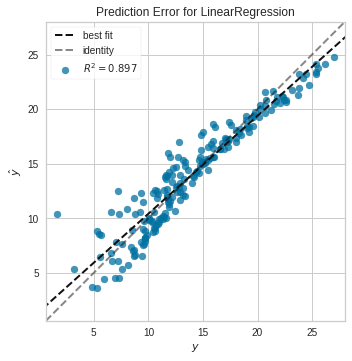

In [12]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(reg)

visualizer.fit(X, y)  
visualizer.score(X, y)  
visualizer.show()

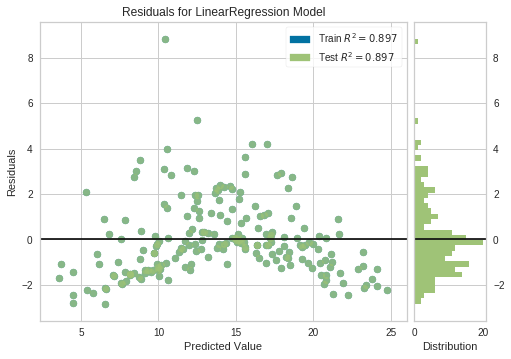

In [17]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(reg)

visualizer.fit(X, y)  
visualizer.score(X, y)  
visualizer.show()

### 問題

http://logopt.com/data/SATGPA.csv データを用いて，2種類のSATの成績からGPAを予測せよ．

### 問題

http://logopt.com/data/Boston.csv のBostonの住宅データを用いて回帰分析を行え．

medvが住宅の価格で，他のデータ（犯罪率や人口など）から予測する．


### 問題

http://logopt.com/data/Auto.csv の車の燃費のデータを用いて回帰分析を行え．

データの詳細については，

https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Auto.html

を参照せよ．

最初の列が燃費（mpg: Mile Per Gallon)であり，これを他の列の情報を用いて予測する．最後の列は車名なので無視して良い．

# 例題２（ダミー変数）

http://logopt.com/data/Diamond.csv からダイアモンドの価格データを読み込み，線形回帰による予測を行う．

列は ["carat","colour","clarity","certification","price"] であり，他の情報から価格(price)の予測を行え．

カラット(carat)以外の列は情報が文字列として保管されている．

これはカテゴリー変数とよばれ，sciki-learnで扱うには，数値に変換してあげる必要がある．

pandasの**get_dummies関数**で数値情報（ダミー変数）に変換してから，線形回帰を行う．

たとえば，色を表すcolour列はD,E,F,G,H,Iの文字列が入っている．これを各値が入っているとき1，それ以外のとき0の数値に変換したものが**ダミー変数**になる．

色はいずれかの値をとるので，ダミー変数は独立でない（1つが1になると，他のすべては0になる）．

最初のダミー変数を除くには，get_dummies関数の引数の**drop_first**をTrueに設定すれば良い．

In [18]:
diamond = pd.read_csv('http://logopt.com/data/Diamond.csv', index_col=0)
diamond.head()

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


In [19]:
diamond = pd.get_dummies(diamond, drop_first=True) #ダミー変数の最初のものを除く
#diamond = pd.get_dummies(diamond) # 除かなくても結果は同じ
diamond.head()

,carat,price,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
1,0.30,1302,0,0,0,0,0,0,1,0,0,0,0
2,0.30,1510,1,0,0,0,0,1,0,0,0,0,0
3,0.30,1510,0,0,1,0,0,0,0,1,0,0,0
4,0.30,1260,0,0,1,0,0,1,0,0,0,0,0
5,0.31,1641,0,0,0,0,0,1,0,0,0,0,0


In [20]:
y = diamond.price                # 従属変数(price)の抽出
X = diamond.drop('price',axis=1) # 独立変数（特徴ベクトル）をpriceの列を除くことによって生成
X.head()

,carat,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
1,0.30,0,0,0,0,0,0,1,0,0,0,0
2,0.30,1,0,0,0,0,1,0,0,0,0,0
3,0.30,0,0,1,0,0,0,0,1,0,0,0
4,0.30,0,0,1,0,0,1,0,0,0,0,0
5,0.31,0,0,0,0,0,1,0,0,0,0,0


In [0]:
from sklearn.linear_model import LinearRegression #線形回帰クラスのインポート
reg = LinearRegression() # 線形回帰クラスのインスタンス生成
reg.fit(X, y)           # 訓練
yhat = reg.predict(X)   # 予測

In [22]:
print("y-切片= ",reg.intercept_)
print("係数 = ",reg.coef_)
print("決定変数= ",reg.score(X,y)) #決定係数の別計算

y-切片=  169.17604383492744
係数 =  [12766.39597047 -1439.0853427  -1841.69054716 -2176.67218633
 -2747.14998002 -3313.1023993  -1474.56614749 -1792.01092358
  -689.29043537 -1191.16426364    15.22672874   141.2624469 ]
決定変数=  0.9581280577870392


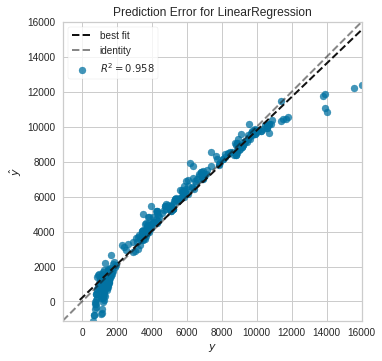

In [23]:
visualizer = PredictionError(reg)

visualizer.fit(X, y)  
visualizer.score(X, y)  
visualizer.show();

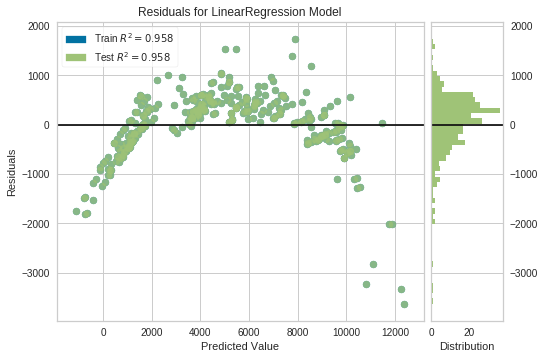

In [24]:
visualizer = ResidualsPlot(reg)

visualizer.fit(X, y)  
visualizer.score(X, y)  
visualizer.show();

### 問題

http://logopt.com/data/carprice.csv から車の価格データを読み込み，線形回帰による予測を行え．

データの詳細は
https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/carprice.html
にある．

車種(Type)，100マイル走る際のガロン数（gpm100），都市部での1ガロンあたりの走行距離（MPG.city），高速道路での１ガロン当たりの走行距離（MPG.highway）から，価格(Price)を予測せよ．

### 問題

教科書79ページのtipsデータに対して線形回帰を用いてもらえるチップの額を予測せよ．

In [27]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# B.3  ロジスティック回帰による分類


spamか否かを判定する例題を用いる．

https://archive.ics.uci.edu/ml/datasets/spambase

様々な数値情報から，**is_spam**列が1 （スパム）か，0（スパムでない）かを判定する．




In [25]:
import pandas as pd
spam = pd.read_csv("http://logopt.com/data/spam.csv",index_col=0)
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


**is_spam**列が従属変数（ターゲット）$y$  になり，それ以外の列が独立変数（特徴ベクトル）$X$ になる

In [0]:
X = spam.drop("is_spam",axis=1)
y = spam.is_spam

In [27]:
from sklearn.linear_model import LogisticRegression #ロジスティック回帰クラスの読み込み
logreg =  LogisticRegression(multi_class='auto',solver="liblinear") # インスタンスの生成
logreg.fit(X, y) # 訓練

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### 分類に対しては，以下の可視化がある．

- 混合行列 (ConfusionMatrix)
- 分類レポート (ClassificationReport)
- 2値分類に対する閾値変化図 (DiscriminationThreshold)
- ROC曲線 (ROCAUC) 

## 混合行列

- positive : 予測(prediction)が 0（スパムでない）；(注意）positiveか否かは相対的なものであるので，どちらでも良い．1（スパム）をpositiveとすることも可能．
- negative : 予測が1（スパム）

- true : あたり
- false : はずれ


| not spam  | spam  |
| ---- | ---- |
| TP  |  FN  |
| FP  |  TN  |





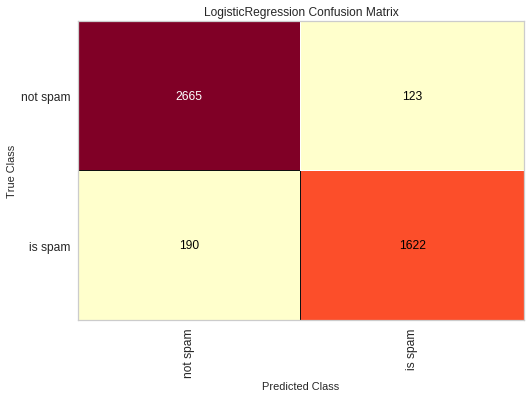

In [28]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(logreg, classes=["not spam", "is spam"])

cm.fit(X, y)
cm.score(X, y)
cm.show();

## メトリクス（評価尺度）

spamでないメイルをspamと判断するのは（false negative），大事なメイルがスパムフォルダに入ってしまうので困る．

spamをspamでないと判断するのは（false positive），スパムを消せば良いのであまり困らない．

正解率(precision)の他の尺度が必要

```
precision = true positives / (true positives + false positives)

recall = true positives / (false negatives + true positives)

F1 score = 2 * ((precision * recall) / (precision + recall))
```

In [29]:
TP, FN, FP, TN = 2666, 122, 189, 1623
precision =  TP/(TP+FP)
recall = TP/(FN+TP)
print( "precision=", precision) 
print( "recall=", recall  ) 
print( "F1 score=", 2*(precision*recall)/(precision+recall) )

precision= 0.933800350262697
recall= 0.9562410329985653
F1 score= 0.9448874712032607


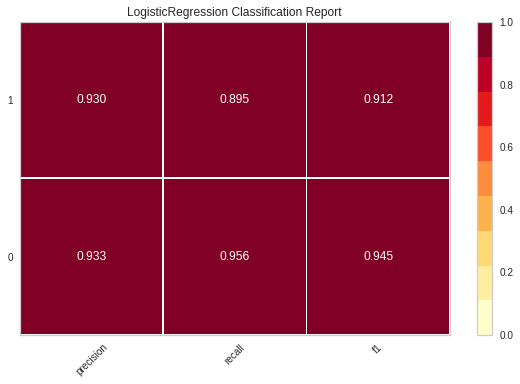

In [30]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(logreg)

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

## 閾値 (threshold)を変えてみる

ロジスティック回帰は，spamでない確率を推定し，それが閾値より大きいとspamでない，それ以外のときspamと判定する．

通常のロジスティック回帰の閾値は0.5

閾値を大きくすると，全部spamと判定（precisionが上がる）

閾値を小さくすると，全部spamでないと判定（recall が上がる）

f1 scoreはバランスをとる

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


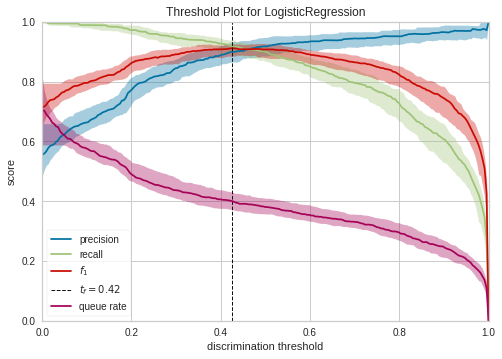

In [31]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(logreg)

visualizer.fit(X, y)     
visualizer.score(X,y)
visualizer.show();       

## ROC曲線

ROC:  受信者操作特性（receiver operating characteristic) 

https://ja.wikipedia.org/wiki/受信者操作特性


閾値を1から0に変えると，recall (true positive rate) が増加し，precision (1-false positive rate) が減少する．

x軸に false positive rate，y軸にtrue positive rateをとると，両方とも1に近づく曲線になる．

曲線の下の面積 (AUC: area under the curve) が評価尺度（大きいほど良い）になる．

```
true positive rate = recall = TP/(TP+FN)

false positive rate = 1-precision = FP/(TN+FP)
```

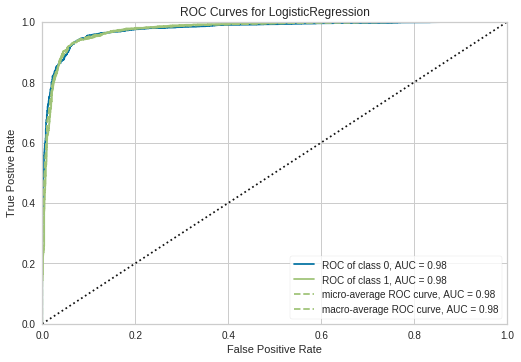

In [32]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logreg, size=(600,400))

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

## iris（アヤメ）のデータ

2値分類だけでなく，3種類以上のものの分類もできる．以下ではアヤメのデータを用いてロジスティック回帰（分類）を行い，3種類のアヤメを分類する．


In [3]:
import plotly.express as px
iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [4]:
#  独立変数（特徴ベクトル） X 
X = iris[ ['sepal_length','sepal_width','petal_length','petal_width'] ]
#従属変数 y 
y = iris['species_id']
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: species_id, dtype: int64

- 手順１：分類するためのクラスをインポートして，インスタンスを生成する．

> 以下の例では，ロジスティック回帰**LogisticRegression**クラスを用いた分類を行う．

-  手順２：fitメソッドを用いて，訓練する．

- 手順３：predictメソッドを用いて予測を行う．


In [5]:
from sklearn.linear_model import LogisticRegression #ロジスティック回帰クラスの読み込み
logreg =  LogisticRegression(multi_class='auto',solver="liblinear") # インスタンスの生成
logreg.fit(X, y) # 訓練

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
logreg.predict([[3, 5, 4, 2]]) # 試しに予測

array([3])

### 予測と実際の誤差を検証（元データXを入れたときの予測y_predと本当の値yの比較）

### metricsにある正解率を計算する関数 accuracy_score を利用

In [0]:
y_pred = logreg.predict(X)

In [8]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


## 可視化


### 以下の2つの可視化を追加

- どの特徴が重要かを可視化する**RadViz**

- 重要と思われる2つの特徴に対して，ロジスティック回帰の分類がどのように行われたかを示す**DecisionViz**（決定の境界を示す）

### スパムと同じ可視化

- 混合行列 (ConfusionMatrix)
- 分類レポート (ClassificationReport)
- ROC曲線 (ROCAUC) 

3値以上の場合には，閾値を変化させる可視化はできないことに注意


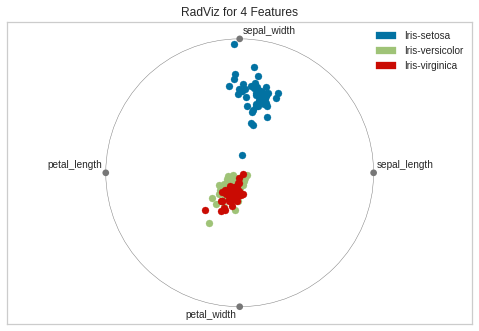

In [9]:
from yellowbrick.features import RadViz

visualizer = RadViz(classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                   size=(600,400))

visualizer.fit(X, y)           
visualizer.transform(X)       
visualizer.show();

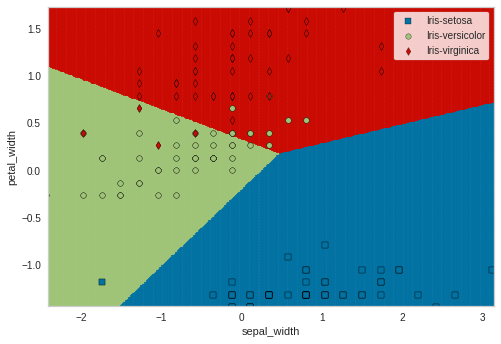

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz

X = iris[ ['sepal_width','petal_width'] ] # 2次元を切り出す
X = StandardScaler().fit_transform(X) #可視化のためにスケーリングしておく

viz = DecisionViz(
    logreg, title="Logistc Regression",
    features = ['sepal_width','petal_width'],
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
)
viz.fit(X, y)
viz.draw(X, y)
viz.show();

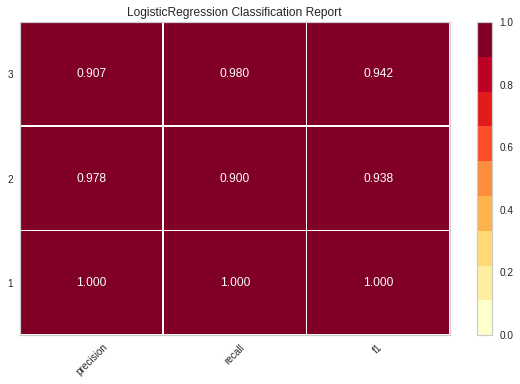

In [10]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(logreg)

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

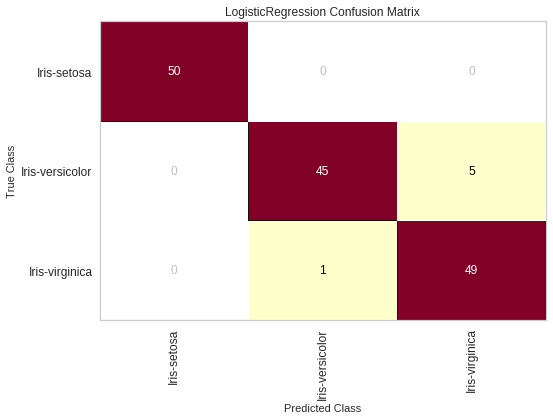

In [43]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(logreg)

cm.fit(X, y)
cm.score(X, y)
cm.show();

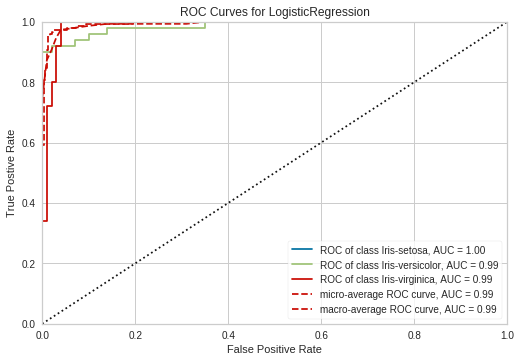

In [44]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logreg, size=(600,400))

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

### 問題

教科書81ページのtitanicデータに対してロジスティック回帰を行い，死亡確率の推定を行え．

ヒント：このデータは欠損値を含んでいる．pandasのところで学んだ欠損値処理を参照せよ．

また，このデータはターゲットとなる**survived**と同じ意味をもつ列を含んでいる．それを入れると正確度は当然100%になる．
その行を見つけて除くにはどうしたら良いか考えよ．

### 問題
 "http://logopt.com/data/cancer.csv" にある胸部癌か否かを判定するデータセットを用いて分類を行え．

最初の列**diagnosis**が癌か否かを表すものであり，'M'が悪性（malignant），'B'が良性（benign）

In [45]:
cancer = pd.read_csv("http://logopt.com/data/cancer.csv", index_col=0)
#従属変数 y 
y = cancer['diagnosis']
#特徴ベクトルの抽出
X= cancer.iloc[ : , 1: ]
X .head() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## K 近傍法による分類と可視化

4種類のフルーツを重量と色で分類する．

フルーツは数値だが，順に "apple", "mandarin","orange","lemon" を表す．

$K$ 近傍法とは，(Xの空間で）データに近い $K$ 個のデータの値(y)の多数決で分類を行う最も簡単な分類手法である．

以下のようにしてクラスをインポートできる．
```python
from sklearn.neighbors import KNeighborsClassifier
```

クラス **KNeighborsClassifier** は引数 **n_neighbors** でパラメータ $K$ を設定できる．

$K$ を色々変えて実験せよ．


In [46]:
fruit = pd.read_csv("http://logopt.com/data/fruit_simple.csv",index_col=0)
fruit.head()

,fruit_label,mass,color_score
0,1,192,0.55
1,1,180,0.59
2,1,176,0.60
3,2,86,0.80
4,2,84,0.79


正解率= 0.9152542372881356


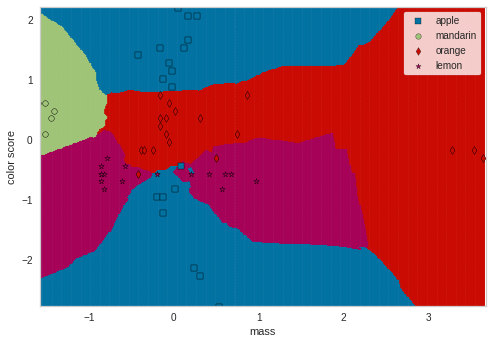

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz

X=fruit.drop("fruit_label",axis=1)
y=fruit.fruit_label
X = StandardScaler().fit_transform(X) #可視化のためにスケーリングしておく

knn = KNeighborsClassifier(5)
knn.fit(X, y) # 訓練
y_pred = knn.predict(X)

print("正解率=",metrics.accuracy_score(y, y_pred))

viz = DecisionViz(
    knn, title="Nearest Neighbors",
    features=['mass', 'color score'], classes=["apple", "mandarin","orange","lemon"]
)
viz.fit(X, y)
viz.draw(X, y)
viz.show();

## 問題

irisデータに対して，$K$ 近傍法で元データを予測したしたときの正解率を計算せよ．パラメータ $K$（近傍の数）が5のときはどうか？また，パラメータ $K$ が 1のときはどうか？（可視化は2次元データではないのでできない．）

# B.4  正規化とB.7 仮説の評価

### 多項式回帰

宣伝の効果のデータを用いて多項式回帰を行う．

pandasで2次の項（たとえばテレビとラジオの相乗効果の列 TV*Radio）を生成してから，線形回帰を行う．

In [0]:
data = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col =0)
data['TV*Radio'] = data.TV * data.Radio
data['TV*Newspaper'] = data.TV * data.Newspaper
data['Radio*Newspaper'] = data.Radio * data.Newspaper
data.head()

,TV,Radio,Newspaper,Sales,TV*Radio,TV*Newspaper,Radio*Newspaper
1,230.1,37.8,69.2,22.1,8697.78,15922.92,2615.76
2,44.5,39.3,45.1,10.4,1748.85,2006.95,1772.43
3,17.2,45.9,69.3,9.3,789.48,1191.96,3180.87
4,151.5,41.3,58.5,18.5,6256.95,8862.75,2416.05
5,180.8,10.8,58.4,12.9,1952.64,10558.72,630.72


In [0]:
X = data[['TV', 'Radio', 'Newspaper','TV*Radio','TV*Newspaper','Radio*Newspaper']]
y = data['Sales']

In [0]:
from sklearn.linear_model import LinearRegression #クラスのインポート
lin_reg = LinearRegression()     # 線形回帰クラスのインスタンス生成
lin_reg.fit(X, y)    # 訓練
yhat = lin_reg.predict(X)   # 予測
print(lin_reg.score(X,y)) #決定係数　（線形回帰だと R^2は 0.897210638179

0.968631106626


In [0]:
print("y-切片= ",lin_reg.intercept_)
print("係数 = ",lin_reg.coef_)

y-切片=  6.46015848994
係数 =  [  2.03270962e-02   2.29291894e-02   1.70339370e-02   1.13928001e-03
  -7.97143541e-05  -1.09597607e-04]


##  過剰適合（過学習）

元データ（訓練データ）を入れてテストをすることは良くない．

irisデータに対してK(=1)近傍法を適用したときのように，過剰適合をしてしまう！

訓練データをテストデータを分ける！ train_test_split関数を使うと簡単．


例としてBostonの住宅データの予測を線形回帰とリッジ回帰（正規化を入れた回帰）行う．

medvが住宅の価格で，他のデータ（犯罪率や人口など）から予測する．

In [0]:
boston = pd.read_csv('http://logopt.com/data/Boston.csv',index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
X = boston.iloc[:,range(13)] # 最後の列以外のデータを独立変数（特徴ベクトル）として抽出
y = boston.medv #最後の列(medv)を従属変数として抽出

In [0]:
from sklearn.model_selection import train_test_split #古いバージョンの場合には,cross_validationの中にある．
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#30%のデータをテスト用，それ以外を訓練用に分離

In [0]:
from sklearn.linear_model import LinearRegression #クラスのインポート
reg = LinearRegression()     # 線形回帰クラスのインスタンス生成
reg.fit(X_train, y_train)    # 訓練
yhat = reg.predict(X_test)   # 予測
print(reg.score(X_test,y_test)) #決定係数

0.67668096441


## 可視化

訓練データで訓練し，テストデータで評価する．

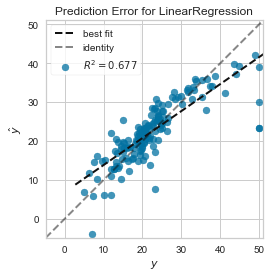

In [0]:
visualizer = PredictionError(reg)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();

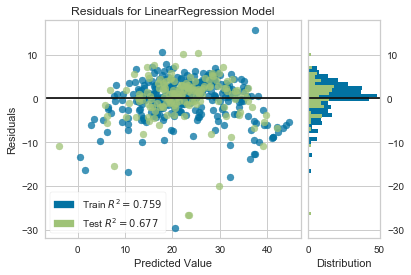

In [0]:
visualizer = ResidualsPlot(reg)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();

### リッジ回帰

教科書460ページになある正規化を追加した線形回帰は，**リッジ回帰**とよばれる．

パラメータ $\lambda$ はリッジ回帰クラス Ridge では引数 alpha で与える．


In [0]:
from sklearn.linear_model import Ridge #クラスのインポート
reg = Ridge(alpha=100.0)     # リッジ回帰クラスのインスタンス生成
reg.fit(X_train, y_train)    # 訓練
yhat = reg.predict(X_test)   # 予測
print(reg.score(X_test,y_test)) #決定係数

0.670856936648


### 問題

1. irisデータを訓練用とテスト用に分けてから，ロジスティック回帰による分類を行い，正解率を計算せよ．
2. titanicデータ訓練用とテスト用に分けてから，ロジスティック回帰による分類を行い，正解率を計算せよ．
3. 例題2で用いた ダイアモンドの価格データhttp://logopt.com/data/Diamond.csv に対して線形回帰とリッジ回帰による予測を行え．また，訓練用とテスト用に分けて決定変数を計算し，評価せよ．


# B.5 カーネルとSVM (Support Vector Machine) 

カーネルはクラス **SVC** (Support Vector Classifier) の引数 **kernel**で与える．

Gaussカーネル（引数は'rbf'）を用いると非線形な境界をもつ問題に対しても，精度良く分類が可能になる．

irisデータで試してみよう．

In [0]:
import pandas as pd
iris = pd.read_csv("http://logopt.com/data/iris.data",
                   names=['sepal length','sepal width','petal length','petal width', 'class'])
X = iris[ ['sepal length','sepal width','petal length','petal width'] ]
y = iris['class']
from sklearn.model_selection import train_test_split  #古いバージョンの場合には,cross_validationの中にある．
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
from sklearn.svm import SVC      #クラスのインポート
svc = SVC(kernel='rbf', gamma="scale")        # インスタンス生成
#svc = SVC(kernel='linear') 
svc.fit(X_train, y_train)    # 訓練
yhat = svc.predict(X_test)   # 予測
from sklearn import metrics
print(metrics.accuracy_score(y_test, yhat)) 

0.977777777778


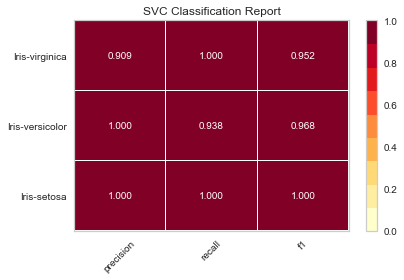

In [0]:
visualizer = ClassificationReport(svc)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

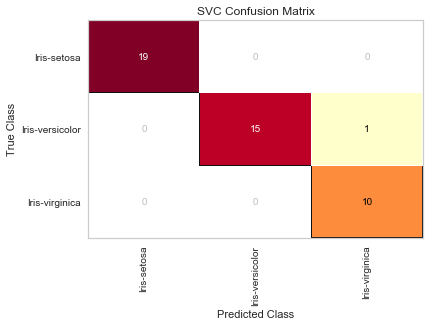

In [0]:
cm = ConfusionMatrix(svc)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

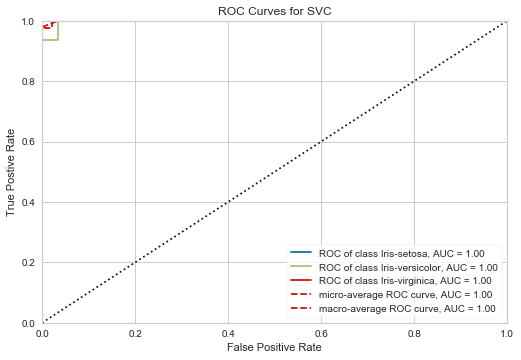

In [0]:
visualizer = ROCAUC(svc, size=(600,400))

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# B.7 仮説の評価

###  １つのテストデータだけではばらつきが大きすぎて信用できない！

### 交差検証を行えば良い！cross_val_scoreを用いる．

上で用いたサポートベクトル分類 svcのインスタンスで試してみる．

引数の*cv*は交差検証(cross validiation)の分割数．

引数の**scoring='accuracy'**は分類の正解率を表す指標を指定している．

（回帰分析のときには，引数を決定変数'r2'などに設定する．）


In [0]:
from sklearn.model_selection import cross_val_score #古いバージョンの場合には,cross_validationの中にある．
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          1.          1.          0.93333333
  0.93333333  0.93333333  1.          1.        ]
0.973333333333


# B.8 ニューラルネット，B.9 単純Bayes，B.10 決定木，B.11 アンサンブル法（ランダム森）

他の手法も，scikit-learnでは同じ手順で分析を行うことができる．

上の続きとしてirisデータで色々試してみよう．

ニューラルネットは旧バージョンでは動かないが，
http://playground.tensorflow.org/
で深層学習（多階層のニューラルネット）を体験することができる．


In [0]:
from sklearn.neural_network import MLPClassifier #ニューラルネット（旧バージョンでは実装されていないので，跳ばして良い．）
neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=1)
neural.fit(X_train, y_train)    # 訓練
yhat = neural.predict(X_test)   # 予測
from sklearn import metrics
print(metrics.accuracy_score(y_test, yhat)) 
scores = cross_val_score(neural, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

1.0
[ 1.          0.93333333  1.          1.          0.8         0.93333333
  0.93333333  0.93333333  1.          1.        ]
0.953333333333


In [0]:
from sklearn.naive_bayes import GaussianNB #単純Bayes
bayes = GaussianNB()
bayes.fit(X_train, y_train)    # 訓練
yhat = bayes.predict(X_test)   # 予測
from sklearn import metrics
print(metrics.accuracy_score(y_test, yhat)) 
scores = cross_val_score(bayes, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

0.955555555556
[ 0.93333333  0.93333333  1.          0.93333333  0.93333333  0.93333333
  0.86666667  1.          1.          1.        ]
0.953333333333


In [0]:
from sklearn import tree
tree_class = tree.DecisionTreeClassifier() #決定木
tree_class.fit(X_train, y_train)    # 訓練
yhat = tree_class.predict(X_test)   # 予測
from sklearn import metrics
print(metrics.accuracy_score(y_test, yhat))
scores = cross_val_score(tree_class, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

0.955555555556
[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  0.93333333  1.          1.        ]
0.953333333333


In [0]:
from sklearn.ensemble import RandomForestClassifier #ランダム森
forest = RandomForestClassifier()
forest.fit(X_train, y_train)    # 訓練
yhat = forest.predict(X_test)   # 予測
from sklearn import metrics
print(metrics.accuracy_score(y_test, yhat)) 
scores = cross_val_score(forest , X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

0.933333333333
[ 1.          0.93333333  1.          0.93333333  0.93333333  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


C:\Users\logop\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 問題

titanicデータを訓練用とテスト用に分けてから，ニューラルネット，単純Bayes，決定木，ランダム森による分類を行い，交差検証を行え．

# B.12 クラスタリング

UCI機械学習レポジトリのワインに関するデータセットを用いてクラスタリングを解説する．

使用するのは**KMeans**クラスで実装されている $k$-平均法である．

元データはこちらに格納されている．

http://logopt.com/data/wine.data

列名は https://archive.ics.uci.edu/ml/datasets/Wine で解説されているが，必要ならば以下のリストを用いて，列名を設定して読み込め．

L = [ 'Alcohol', 'Malic','Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoid', 'Proanthocyanins', 'Color', 'Hue', 'OD280', 'OD315', 'Proline']

In [0]:
import pandas as pd
L = [ 'Alcohol', 'Malic','Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoid',
     'Proanthocyanins', 'Color', 'Hue', 'OD280', 'OD315', 'Proline']
wine = pd.read_csv('http://logopt.com/data/wine.data',names=L)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
from sklearn.cluster import KMeans  # クラスをインポート
kmeans = KMeans(n_clusters=8)       # インスタンス生成
kmeans.fit(wine)                    # 訓練

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
wine['label'] = kmeans.labels_
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,OD315,Proline,label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,6
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,7


### 問題

irisのデータセットの各データを $k$-平均法を用いて3つのクラスターに分けよ．

# B.13 主成分分析

irisデータセットを用いて主成分分析と可視化の方法を説明する．


In [0]:
import pandas as pd
iris = pd.read_csv("http://logopt.com/data/iris.data",
                   names=['sepal length','sepal width','petal length','petal width', 'class'])
X = iris[ ['sepal length','sepal width','petal length','petal width'] ]

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2次元に射影
pca.fit(X)
pca.components_ #射影行列

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [0]:
Z = pca.transform(X) # 射影したデータ
# 射影した2次元データを元のデータフレームに追加
iris['X']=Z[:,0]
iris['Y']=Z[:,1]

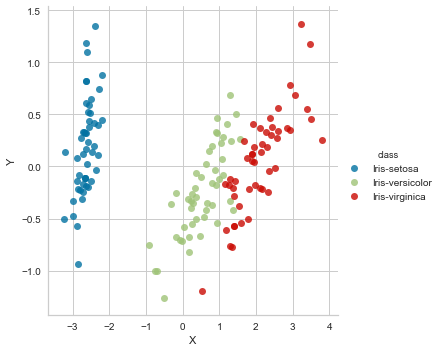

In [0]:
#seabornの lmplot で描画（hueは色調指定，fit_reg=Falseは線を描画しない）
import seaborn as sns
%matplotlib inline
sns.lmplot(x='X',y='Y',hue='class',fit_reg=False,data=iris);

### 問題

http://logopt.com/data/drinks.csv にある国別のアルコール摂取量データを用いて主成分分析を行え．

4次元の数値データを2次元に射影し，2次元座標で表示せよ．その際，色調としては，大陸(continent)列を用いよ．

### 問題

クラスタリングの例で用いたワインのデータを2次元に射影して，クラスタリングされたラベルを色調として描画せよ．

# 特徴量の重要度を調べる

graphvizとrfmimpをインストールする。

https://github.com/parrt/random-forest-importances


In [2]:
!sudo apt install graphviz
!pip install rfpimp

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10086 sha256=cb4a159d00e2fa54d1cad9f10848e31e1f71114b1a0d7368d720bf40012a8b01
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


In [0]:
from rfpimp import *
from sklearn.ensemble import RandomForestRegressor

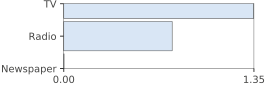

In [8]:
data = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col =0) #0行目をインデックスにする．
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

rf = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)
rf.fit(X, y)

imp = importances(rf, X, y, n_samples=-1)
viz = plot_importances(imp)
display(viz)

# 決定木の可視化


dtreevizをインポートする。

In [5]:
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-0.7.1-cp36-none-any.whl size=20264 sha256=6eeb4e1505bd7730a2178790dffc5634571cbf5612eb6fa8cdad4b8f4b257244
  Stored in directory: /root/.cache/pip/wheels/1a/de/95/59b4de6e236db6acc37856d122cff2d3414ed09f99564ba9c1
Successfully built dtreeviz


In [6]:
from sklearn import tree
import pandas as pd
data = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col =0) #0行目をインデックスにする．
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

reg = tree.DecisionTreeRegressor(max_depth=2)  # limit depth of tree
reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


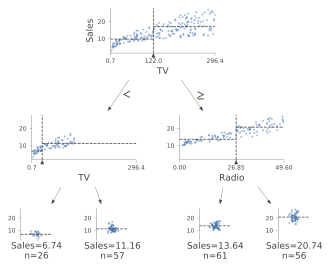

In [7]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    reg,
    X, 
    y,
    feature_names = data.columns,
    target_name = "Sales"
) 

display(viz)

22.1


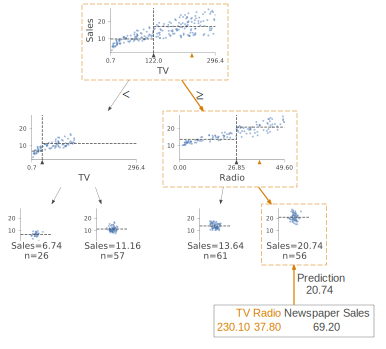

In [9]:
viz = dtreeviz(
    reg,
    X, 
    y,
    feature_names = data.columns,
    target_name = "Sales",
    X = X.iloc[0]
) 

print(y.iloc[0])
display(viz)

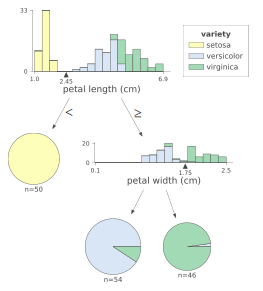

In [11]:
from sklearn.datasets import *
iris = load_iris()
classifier = tree.DecisionTreeClassifier(max_depth=2)  # limit depth of tree
classifier.fit(iris.data, iris.target)

viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"] 
              )  
display(viz)

viz.save("tree2.svg")